# AM217 Patterns in Fluids
## 2.1 Numerical Simulations 
----------
***

The advection-diffusion equation in one spatial dimension looks like this:

$$\frac{\partial f}{\partial t} + U \frac{\partial f}{\partial x} = D \frac{\partial ^2f}{\partial x^2}$$

Lets take an initial condition as follows:

$$ f(x,t=0)=sin(2\pi kx)$$

Then the exact analytical solution for the advection-diffusion equation will be:

$$ f(x,t=0)=e^{-Dk^2t}sin(2\pi k(x-Ut))$$



5.0


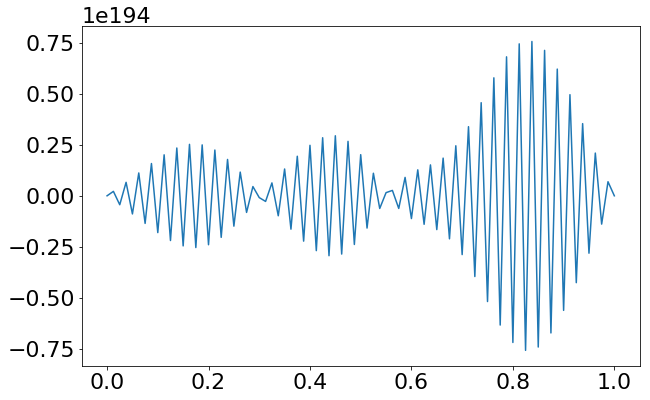

In [94]:
%matplotlib inline
import numpy as np              
import matplotlib.pyplot as plt    
import matplotlib
from math import pi, exp
matplotlib.rcParams.update({'font.size': 22})

nx = 81
dx = 1 / (nx - 1)
nt = 100    #the number of timesteps we want to calculate
D = 1.0e-1   #the value of diffusivity
U = 0.0   # wave speed
dt = 0.05
#---
sigma = 0.2 #sigma is a parameter - tuned for the stability constraint
#dt = sigma * dx**2 / D #dt is defined using sigma ... more later!
#---

tt = 0.03125
x = np.linspace(0,1,nx)
u_ao = np.sin(2.0*pi*x) #initial condition
u_a1 = exp(-D*tt) * np.sin(2.0*pi*(x-U*tt))

u = np.sin(2.0*pi*k*x) #our placeholder array, un, to advance the solution in time

for n in range(nt):  #iterate through time
    un = u.copy()    #copy the existing values of u into un
    for i in range(1, nx - 1):
        u[i] = un[i] + D * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1]) - \
                     U * dt / (2.0*dx) * (un[i+1]-un[i-1])
        
fig = plt.figure(1,figsize=(10,10/1.6))
plt.plot(x,u)
print(dt*nt)

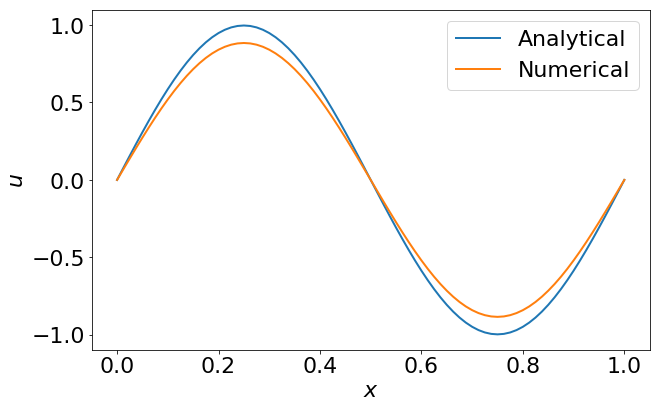

In [92]:
#Initial condition

fig = plt.figure(1,figsize=(10,10/1.6))

#plt.plot(x,u_ao,lw=2.0,label='t=0')
plt.plot(x,u_a1,lw=2.0,label='Analytical')
plt.plot(x,u,lw=2.0,label='Numerical')
plt.xlabel(r'$x$'); plt.ylabel(r'$u$'); plt.legend()
plt.show()

In [89]:
u_n2 = u